In [2]:
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation

In [3]:
# from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

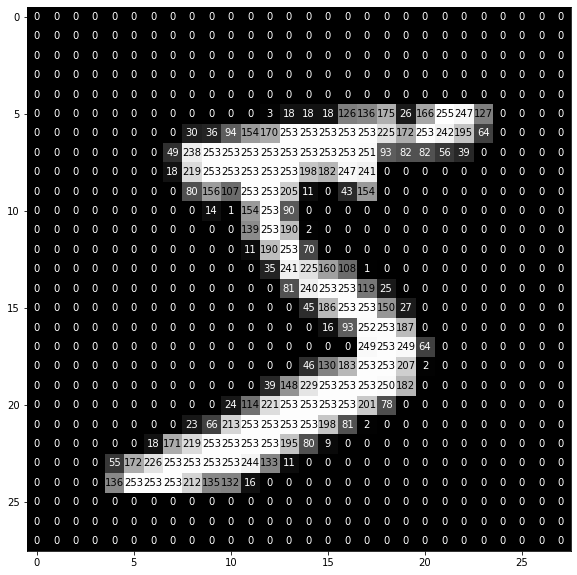

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)

Text(0.5, 1.0, '[7]')

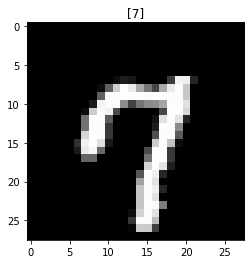

In [6]:
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])

In [7]:
# How many images are there in every digit?
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [8]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [9]:
# Normalization : Scaling down the value to a specific range(0-1)
x_train=x_train/255
x_test = x_test/255

# AFter Normalization
print(x_train.max())
print(x_train.min())

1.0
0.0


In [15]:
batch_size = 128
num_classes = 10
epochs = 20

In [16]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train = x_train.reshape(60000, 784)
# x_test = x_test.reshape(10000, 784)
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

In [17]:
from keras.layers import Flatten
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # 784
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

In [18]:
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-tr

In [20]:
from tensorflow.keras.utils import plot_model
print("layer nums:", len(model.layers))
plot_model(model, to_file='MNIST_MLP.png', show_shapes=True, show_layer_names=False)

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# model.summary()
# from tensorflow.keras.utils import plot_model
# print("layer nums:", len(model.layers))
# plot_model(model, to_file='MNIST_MLP.png', show_shapes=True, show_layer_names=False)

layer nums: 6
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 4.0823 - accuracy: 0.8581 - val_loss: 0.3124 - val_accuracy: 0.9335
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5550 - accuracy: 0.9030 - val_loss: 0.2948 - val_accuracy: 0.9332
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4269 - accuracy: 0.9220 - val_loss: 0.2125 - val_accuracy: 0.9574
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3907 - accuracy: 0.9287 - val_loss: 0.2172 - val_accuracy: 0.9477
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3447 - accuracy: 0.9359 - val_loss: 0.2110 - val_accuracy: 0.9543
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3206 - accuracy: 0.9398 - val_loss:

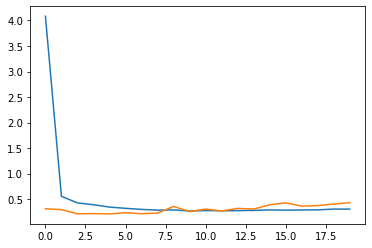

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

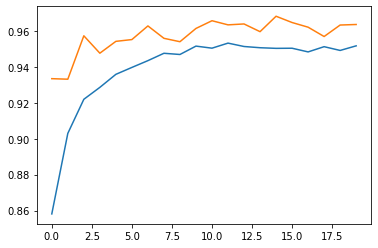

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 [==============================] - 0s 86ms/step


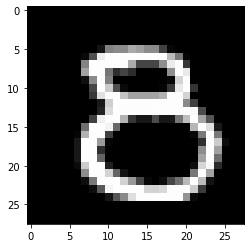

In [23]:
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

img = image.load_img(path="8.png", color_mode= 'grayscale', target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [24]:
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

1/1 [==============================] - 0s 14ms/step


In [25]:
prediction

8

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

y_test = np.argmax(y_test,axis=1)

accuracy_score(y_pred,y_test)

313/313 [==============================] - 0s 1ms/step


0.9637

In [27]:
confusion_matrix(y_pred,y_test)

array([[ 958,    2,    5,    3,   20,   14,    5,    3,    1,   10],
       [   0, 1117,    0,    0,    3,    0,    2,   22,    3,    2],
       [   2,    4,  994,    3,    2,    0,    1,    8,    2,    0],
       [   1,    2,    8,  989,    0,   17,    1,   10,    6,   11],
       [   2,    0,    0,    0,  939,    2,    8,    5,    1,   16],
       [   2,    2,    0,    3,    0,  835,    2,    0,    1,    1],
       [   3,    1,    2,    0,    4,    7,  932,    0,    1,    0],
       [   5,    0,    4,    2,    1,    0,    0,  960,    0,    0],
       [   7,    6,   18,    7,    2,   15,    7,    3,  953,    9],
       [   0,    1,    1,    3,   11,    2,    0,   17,    6,  960]],
      dtype=int64)

In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1021
           1       0.98      0.97      0.98      1149
           2       0.96      0.98      0.97      1016
           3       0.98      0.95      0.96      1045
           4       0.96      0.97      0.96       973
           5       0.94      0.99      0.96       846
           6       0.97      0.98      0.98       950
           7       0.93      0.99      0.96       972
           8       0.98      0.93      0.95      1027
           9       0.95      0.96      0.96      1001

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [29]:
model.save("impr_mnist.hdf5")

In [8]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28))) # 784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1500/1500 [==============================] - ETA: 0s - loss: 0.2298 - accuracy: 0.9332WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D0007C79D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

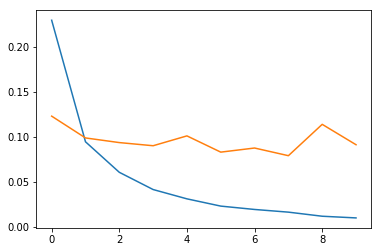

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

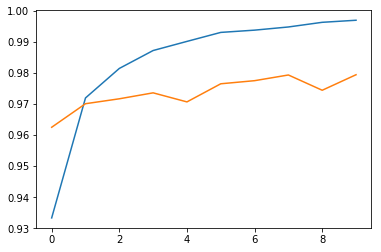

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


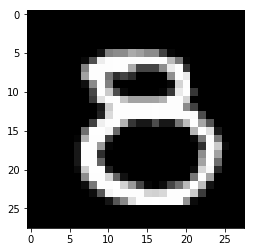

In [11]:
from keras.preprocessing import image

img = image.load_img(path="8.png", color_mode= 'grayscale', target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [12]:
prediction

8

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
accuracy_score(y_pred,y_test)

0.9809

In [14]:
confusion_matrix(y_pred,y_test)

array([[ 968,    0,    5,    0,    1,    2,    3,    0,    1,    1],
       [   1, 1130,    0,    0,    0,    0,    2,    2,    0,    2],
       [   0,    1, 1003,    1,    1,    0,    0,    4,    4,    0],
       [   1,    0,    2,  990,    1,    6,    0,    3,   12,    1],
       [   1,    0,    4,    0,  958,    0,    1,    0,    3,    4],
       [   2,    0,    0,    4,    1,  875,    3,    0,    6,    5],
       [   4,    1,    3,    0,    5,    3,  947,    0,    3,    1],
       [   1,    0,   12,    5,    1,    0,    2, 1015,    5,    7],
       [   2,    3,    3,    1,    1,    2,    0,    1,  935,    0],
       [   0,    0,    0,    9,   13,    4,    0,    3,    5,  988]],
      dtype=int64)

In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       981
           1       1.00      0.99      0.99      1137
           2       0.97      0.99      0.98      1014
           3       0.98      0.97      0.98      1016
           4       0.98      0.99      0.98       971
           5       0.98      0.98      0.98       896
           6       0.99      0.98      0.98       967
           7       0.99      0.97      0.98      1048
           8       0.96      0.99      0.97       948
           9       0.98      0.97      0.97      1022

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [16]:
model.save("mnist.hdf5")